In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from scipy.optimize import least_squares

######################## Some Pandas Reminders ####################################
# MyData.head()                             # Peak at first 5 rows of the data
# MyData.x                                  # Data of column called "x"
# MyData.iloc[0,:]                          # First row
# MyData.iloc[:,0]                          # First column
# MyData.columns[0]                         # Name of first column
# MyData['Seconds'] = 3600 * MyData.Hours   # Create a new column named as such and caluclated as such
# MyData[MyData > 0]                        # Return Data Frame with conditional

In [2]:
'''Describe the experiment'''
'''
pL2f1510 is pLacI-RBS30-GFP (P017-U015-SC035)
pL2f1513 is pBAD-RBS30-GFP, pLacI-RBS30-AraC* (P080-U015-SC035, P017-U015-SC047)
pL2f1532 is pPhl-RBS30-GFP, pLacI-RBS30-AraC*, pBAD-RBS30-phlF (P081-U015-SC035, P017-U015-SC047, P080-U015-SC049)
pL2f1537 is pOR1-RBS30-GFP, pLacI-RBS30-AraC*, pBAD-RBS30-cI (P080-U015-SC035, P017-U015-SC047, P080-U015-SC003)
pL2f1542 is pBAD-RBS30-GFP, pLacI-RBS30-AraC*, pBAD-RBS30-LasR (P080-U015-SC035, P017-U015-SC047, P080-U015-SC012)
'''
print()

In [3]:
'''Define some user functions'''      
def act_hill_function(x, basal, maximal, Kd, n):
    return basal + maximal * (x**n / (Kd**n + x**n))

def log_act_hill_function(x, basal, maximal, Kd, n):
    return np.log10(basal + maximal * (x**n / (Kd**n + x**n)))

def rep_hill_function(x, basal, maximal, Kd, n):
    return basal + maximal * (1 / (x / Kd)**n)

def log_rep_hill_function(x, basal, maximal, Kd, n):
    return np.log10(basal + maximal * (1 / (x / Kd)**n))

list_of_params_to_fit = ['Basal', 'Max', 'Kd', 'n'] 
def report_paramaters(fit_param_names, fit_param_values):
    for each in range(len(fit_param_names)):
        print(fit_param_names[each], 'is', np.round(fit_param_values[each], 3))

In [4]:
'''Import the data'''
data = pd.read_excel('data.xlsx') # This data is GFP (GeoMean MEFL)
data

,arabinose_uM,pL2f1EV,pL2f1510,pL2f1513,pL2f1542,pL2f1532,pL2f1537
0,0.0,11.861457,3393.982073,47.799325,212.727250,122399.303632,690.192954
1,2.0,9.085009,3457.731889,48.372526,213.776024,114276.988342,668.647536
2,4.0,9.803846,3404.685218,53.452200,203.655354,106539.439185,605.657544
3,8.0,8.577498,3443.905436,73.770865,213.737731,86369.852498,492.930734
4,16.0,5.968634,3449.242547,140.500528,211.194516,54475.208562,369.818119
5,31.0,9.372346,3394.129048,360.688864,212.243381,15310.409700,241.250926
6,62.5,10.815171,3418.203820,1287.895414,283.882843,3864.749048,158.613040
7,125.0,9.234953,3407.973587,4562.273768,491.160751,695.528320,96.548227
8,250.0,9.789828,3403.376247,16902.075062,809.850455,299.792917,73.767416
9,500.0,9.635792,3388.712744,74459.305346,1114.339930,233.063894,67.728497


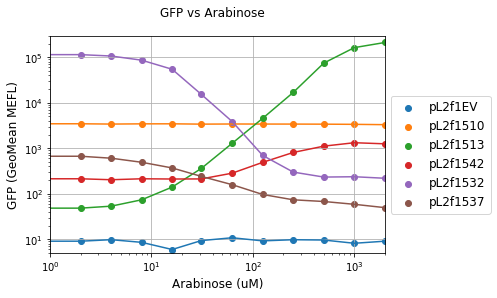

In [5]:
'''Visualize the raw data as a function of arabinose'''

plt.plot(data.arabinose_uM, data.pL2f1EV, label='_nolegend_')
plt.plot(data.arabinose_uM, data.pL2f1510, label='_nolegend_')
plt.plot(data.arabinose_uM, data.pL2f1513, label='_nolegend_')
plt.plot(data.arabinose_uM, data.pL2f1542, label='_nolegend_')
plt.plot(data.arabinose_uM, data.pL2f1532, label='_nolegend_')
plt.plot(data.arabinose_uM, data.pL2f1537, label='_nolegend_')

plt.scatter(data.arabinose_uM, data.pL2f1EV)
plt.scatter(data.arabinose_uM, data.pL2f1510)
plt.scatter(data.arabinose_uM, data.pL2f1513)
plt.scatter(data.arabinose_uM, data.pL2f1542)
plt.scatter(data.arabinose_uM, data.pL2f1532)
plt.scatter(data.arabinose_uM, data.pL2f1537)

plt.suptitle('GFP vs Arabinose')
plt.legend(bbox_to_anchor=(1,0.75), fontsize=12)

plt.xlabel('Arabinose (uM)', fontsize=12)
plt.xscale('log')
plt.xlim(1,max(data.arabinose_uM))

plt.ylabel('GFP (GeoMean MEFL)', fontsize=12)
plt.yscale('log')
plt.ylim(5,3*10**5)

plt.grid()
plt.savefig('All - GFP vs Arabinose.png', transparent=True, bbox_inches='tight', dpi = 400, size=(8,6))
plt.show()

In [6]:
loss = 0.00443383612441
       # in units of min**-1     

Basal is 0.217
Max is 1234.866
Kd is 921.763
n is 2.006


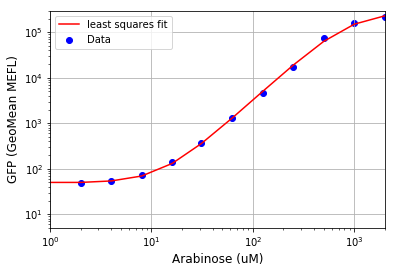

In [7]:
'''
The thing is that pL2f1542, pL2f1532, pL2f1537 aren't Arabinose --> GFP
They are Arabinose --> Transcription Factor --> GFP
So we need to use the pL2f1513 transfer curve to convert Arabinose --> Transcription Factor
Let's build a model for pL2f1513
'''

def pL2f1513_model(arabinose, *parameters):
    k_express = act_hill_function(arabinose, *parameters)
    GFP = k_express / loss # At steady state
    return GFP
    
def pL2f1513_error_function(current_parameter_guess):
    '''We log transform the guess and ground truth to remove large number bias'''
    current_parameter_guess = tuple(current_parameter_guess)
    y_guess = pL2f1513_model(data.arabinose_uM, *current_parameter_guess)
    error = np.log10(y_guess) - np.log10(data.pL2f1513)
    return error

initial_guess = (100, 100, 100, 2)
low_bounds = [0, 0, 0, 0]
up_bounds = [10000000, 10000000, 10000000, 10]
pL2f1513_parameters = least_squares(pL2f1513_error_function,
                                    initial_guess, 
                                    bounds=(low_bounds, 
                                            up_bounds)
                                    ).x
report_paramaters(list_of_params_to_fit, pL2f1513_parameters)

plt.scatter(data.arabinose_uM, data.pL2f1513, c='b', label='Data')
plt.plot(data.arabinose_uM, pL2f1513_model(data.arabinose_uM, *pL2f1513_parameters), c='r', label='least squares fit')

plt.legend(loc = 'best')

plt.xlabel('Arabinose (uM)', fontsize=12)
plt.xscale('log')
plt.xlim(1,max(data.arabinose_uM))

plt.ylabel('GFP (GeoMean MEFL)', fontsize=12)
plt.yscale('log')
plt.ylim(5,3*10**5)

plt.grid()
plt.savefig('pL2f1513 - GFP vs Arabinose.png', transparent=True, bbox_inches='tight', dpi = 400, size=(8,6))
plt.show()

In [8]:
'''
So now let's build a model for the other plasmids pL2f1542, pL2f1532, and pL2f1537
So we need to convert Arabinose into transcription factor (TF) using the model from pL2f1513
The reason we don't just use the pL2f1513 data set is to be generic 
    in case now or in the future we have arabinose inputs that weren't in our initial pL2f1513 characterization
'''
data['TF_MEFL'] = act_hill_function(data.arabinose_uM, *pL2f1513_parameters)
xsmooth = np.linspace(min(data.TF_MEFL), max(data.TF_MEFL), 1000000)
data

,arabinose_uM,pL2f1EV,pL2f1510,pL2f1513,pL2f1542,pL2f1532,pL2f1537,TF_MEFL
0,0.0,11.861457,3393.982073,47.799325,212.727250,122399.303632,690.192954,0.216960
1,2.0,9.085009,3457.731889,48.372526,213.776024,114276.988342,668.647536,0.222580
2,4.0,9.803846,3404.685218,53.452200,203.655354,106539.439185,605.657544,0.239525
3,8.0,8.577498,3443.905436,73.770865,213.737731,86369.852498,492.930734,0.307563
4,16.0,5.968634,3449.242547,140.500528,211.194516,54475.208562,369.818119,0.580682
5,31.0,9.372346,3394.129048,360.688864,212.243381,15310.409700,241.250926,1.586218
6,62.5,10.815171,3418.203820,1287.895414,283.882843,3864.749048,158.613040,5.785263
7,125.0,9.234953,3407.973587,4562.273768,491.160751,695.528320,96.548227,22.275678
8,250.0,9.789828,3403.376247,16902.075062,809.850455,299.792917,73.767416,84.263237
9,500.0,9.635792,3388.712744,74459.305346,1114.339930,233.063894,67.728497,280.226094


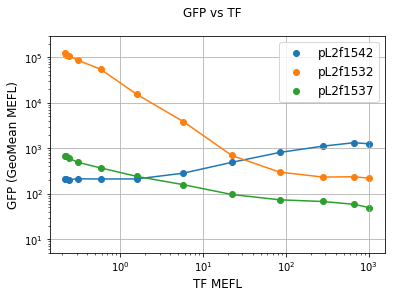

In [9]:
# Let's replot the total data with this new x-axis

plt.plot(data.TF_MEFL, data.pL2f1542, label='_nolegend_')
plt.plot(data.TF_MEFL, data.pL2f1532, label='_nolegend_')
plt.plot(data.TF_MEFL, data.pL2f1537, label='_nolegend_')

plt.scatter(data.TF_MEFL, data.pL2f1542)
plt.scatter(data.TF_MEFL, data.pL2f1532)
plt.scatter(data.TF_MEFL, data.pL2f1537)

plt.suptitle('GFP vs TF')
plt.legend(loc='best', fontsize=12)

plt.xlabel('TF MEFL', fontsize=12)
plt.xscale('log')

plt.ylabel('GFP (GeoMean MEFL)', fontsize=12)
plt.yscale('log')
plt.ylim(5,3*10**5)

plt.grid()
plt.savefig('All - GFP vs TF_MEFL.png', transparent=True, bbox_inches='tight', dpi = 400, size=(8,6))
plt.show()

Basal is 0.898
Max is 8.513
Kd is 8.624
n is 1.149


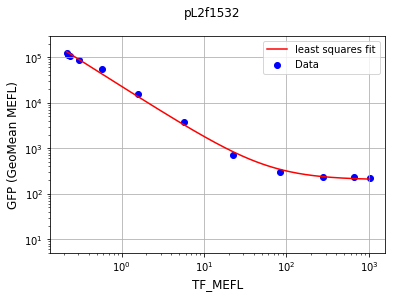

In [10]:
# Let's build a model for pL2f1532

def pL2f1532_model(TF, *parameters):
    k_express = rep_hill_function(TF, *parameters)
    GFP = k_express / loss # At steady state
    return GFP

def pL2f1532_error_function(current_parameter_guess):
    current_parameter_guess = tuple(current_parameter_guess)
    y_guess = pL2f1532_model(data.TF_MEFL, *current_parameter_guess)
    error = np.log10(y_guess) - np.log10(data.pL2f1532)
    return error

initial_guess = (100, 100, 100, 2)
low_bounds = [0, 0, 0, 0]
up_bounds = [10000000, 10000000, 10000000, 10]
pL2f1532_parameters = least_squares(pL2f1532_error_function,
                                    initial_guess, 
                                    bounds=(low_bounds, 
                                            up_bounds)
                                    ).x
report_paramaters(list_of_params_to_fit, pL2f1532_parameters)

plt.scatter(data.TF_MEFL, data.pL2f1532, c='b', label='Data')
plt.plot(xsmooth, pL2f1532_model(xsmooth, *pL2f1532_parameters), c='r', label='least squares fit')

plt.legend(loc = 'best')
plt.suptitle('pL2f1532')

plt.xlabel('TF_MEFL', fontsize=12)
plt.xscale('log')

plt.ylabel('GFP (GeoMean MEFL)', fontsize=12)
plt.yscale('log')
plt.ylim(5,3*10**5)

plt.grid()
plt.savefig('pL2f1532 - GFP vs TF_MEFL.png', transparent=True, bbox_inches='tight', dpi = 400, size=(8,6))
plt.show()

Basal is 0.908
Max is 5.088
Kd is 69.519
n is 1.046


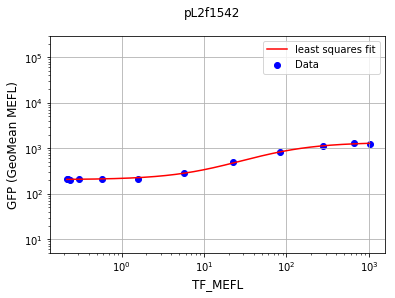

In [11]:
# Let's build a model for pL2f1542

def pL2f1542_model(TF, *parameters):
    k_express = act_hill_function(TF, *parameters)
    GFP = k_express / loss # At steady state
    return GFP

def pL2f1542_error_function(current_parameter_guess):
    current_parameter_guess = tuple(current_parameter_guess)
    y_guess = pL2f1542_model(data.TF_MEFL, *current_parameter_guess) 
    error = np.log10(y_guess) - np.log10(data.pL2f1542)
    return error

initial_guess = (100, 100, 100, 2)
low_bounds = [0, 0, 0, 0]
up_bounds = [10000000, 10000000, 10000000, 10]
pL2f1542_parameters = least_squares(pL2f1542_error_function,
                                    initial_guess, 
                                    bounds=(low_bounds, 
                                            up_bounds)
                                    ).x
report_paramaters(list_of_params_to_fit, pL2f1542_parameters)

plt.scatter(data.TF_MEFL, data.pL2f1542, c='b', label='Data')
plt.plot(xsmooth, pL2f1542_model(xsmooth, *pL2f1542_parameters), c='r', label='least squares fit')

plt.legend(loc = 'best')
plt.suptitle('pL2f1542')

plt.xlabel('TF_MEFL', fontsize=12)
plt.xscale('log')

plt.ylabel('GFP (GeoMean MEFL)', fontsize=12)
plt.yscale('log')
plt.ylim(5,3*10**5)

plt.grid()
plt.savefig('pL2f1542 - GFP vs TF_MEFL.png', transparent=True, bbox_inches='tight', dpi = 400, size=(8,6))
plt.show()

Basal is 0.218
Max is 1.087
Kd is 1.11
n is 0.536


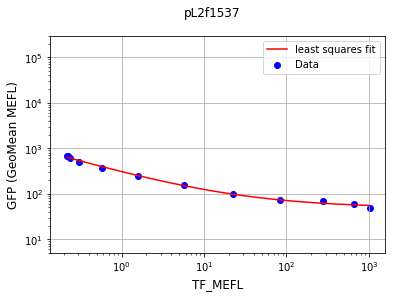

In [12]:
# Let's build a model for pL2f1537
def pL2f1537_model(TF, *parameters):
    k_express = rep_hill_function(TF, *parameters)
    GFP = k_express / loss # At steady state
    return GFP

def pL2f1537_error_function(current_parameter_guess):
    current_parameter_guess = tuple(current_parameter_guess)
    y_guess = pL2f1537_model(data.TF_MEFL, *current_parameter_guess) 
    error = np.log10(y_guess) - np.log10(data.pL2f1537)
    return error

initial_guess = (100, 100, 100, 2)
low_bounds = [0, 0, 0, 0]
up_bounds = [10000000, 10000000, 10000000, 10]
pL2f1537_parameters = least_squares(pL2f1537_error_function,
                                    initial_guess, 
                                    bounds=(low_bounds, 
                                            up_bounds)
                                    ).x
report_paramaters(list_of_params_to_fit, pL2f1537_parameters)


plt.scatter(data.TF_MEFL, data.pL2f1537, c='b', label='Data')
plt.plot(xsmooth, pL2f1537_model(xsmooth, *pL2f1537_parameters), c='r', label='least squares fit')

plt.legend(loc = 'best')
plt.suptitle('pL2f1537')

plt.xlabel('TF_MEFL', fontsize=12)
plt.xscale('log')

plt.ylabel('GFP (GeoMean MEFL)', fontsize=12)
plt.yscale('log')
plt.ylim(5,3*10**5)

plt.grid()
plt.savefig('pL2f1537 - GFP vs TF_MEFL.png', transparent=True, bbox_inches='tight', dpi = 400, size=(8,6))
plt.show()